Name: Qiaochu Dai

Githubname: Levi519519

USCID: 7326115044

## 1. Time Series Classification Part 1: Feature Creation/Extraction
An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.
#### (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity.1 Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which con- tains 6 time series and each time series has 480 consecutive values.
#### (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [263]:
from scipy.stats import bootstrap
from IPython.display import display, Image
import matplotlib.image as mpimg
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import os
from itertools import cycle
import warnings
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [8]:
path = "../data/AReM/" 
#files= os.listdir(path)
test=[]
train=[]
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        if 'pdf' not in name and 'DS_Store' not in name:
            if 'bending1' in root or 'bending2' in root:
                if 'dataset1.csv' in name or 'dataset2.csv' in name:
                    test.append(os.path.join(root, name))
                else: 
                    train.append(os.path.join(root, name))
            else:
                if 'dataset1.csv' in name or 'dataset2.csv' in name or 'dataset3.csv' in name:
                    test.append(os.path.join(root, name))
                else:
                    train.append(os.path.join(root, name))

#### (c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

##### i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

* Minimum
* Maximum
* Mean
* Median
* Mode
* Range
* Interquartile Range (IQR)
* Cross-correlation
* Variance
* Skewness

##### ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.2

In [9]:
def get_tdf(data):
    c_min=min(data)
    c_max=max(data)
    c_mean=np.mean(data)
    c_median=np.median(data)
    c_std=np.std(data)
    c_1st_quartile=np.percentile(data, 25)
    c_3st_quartile=np.percentile(data, 75)
    return c_min,c_max,c_mean,c_median,c_std,c_1st_quartile,c_3st_quartile

In [10]:
time_domain_features = ['min', 'max', 'mean', 'median', 'std', '1st_quartile', '3rd_quartile']
all_result = []
instance=1

for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        if 'pdf' not in name and 'DS_Store' not in name:
            file=os.path.join(root, name)
            df=pd.read_csv(file,skiprows=4)
            result={}
            result['instance']=instance
            instance+=1
            if instance==25:
                column_names = ['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
                df=pd.read_csv(file,skiprows=5,delimiter=' ',index_col=False)
                df.columns = column_names
            for i in range(1,7):
                c_min,c_max,c_mean,c_median,c_std,c_1st_quartile,c_3st_quartile=get_tdf(df.iloc[:,i])
                result['min'+str(i)]=c_min
                result['max'+str(i)]=c_max
                result['mean'+str(i)]=c_mean
                result['median'+str(i)]=c_median
                result['std'+str(i)]=c_std
                result['1st_quartile'+str(i)]=c_1st_quartile
                result['3st_quartile'+str(i)]=c_3st_quartile
            all_result.append(result)
final_result = {key: [d[key] for d in all_result] for key in result}
final_result=pd.DataFrame(final_result)
#excel_file_path = '/Users/daiqiaochu/Desktop/dsci552/hw/hw3/output.xlsx'
#final_result.to_excel(excel_file_path, index=False)
final_result

instance   min1   max1      mean1  median1      std1  1st_quartile1  \
0          1  36.25  48.00  43.969125    44.50  1.616677        43.3100   
1          2  37.00  48.00  43.454958    43.25  1.384653        42.5000   
2          3  33.00  47.75  42.179813    43.50  3.666840        39.1500   
3          4  33.00  45.75  41.678063    41.75  2.241152        41.3300   
4          5  37.25  45.00  40.624792    40.50  1.475428        39.2500   
..       ...    ...    ...        ...      ...       ...            ...   
83        84  18.50  44.25  35.752354    36.00  4.609992        33.0000   
84        85  24.25  45.00  37.177042    36.25  3.577569        34.5000   
85        86  23.33  43.50  36.244083    36.75  3.818032        33.4575   
86        87  26.25  44.25  36.957458    36.29  3.431283        34.5000   
87        88  27.75  44.67  37.144833    36.33  3.754986        34.0000   

    3st_quartile1  min2   max2  ...      std5  1st_quartile5  3st_quartile5  \
0           44.67   0.0   1.50  ...  3.314843        20.5000        23.7500   
1           45.00   0.0   1.58  ...  2.486268        22.2500        24.0000   
2           45.00   0.0   3.00  ...  3.845436        30.4575        36.3300   
3           42.75   0.0   2.83  ...  2.408514        28.4575        31.2500   
4           42.00   0.0   1.30  ...  2.186168        33.0000        36.0000   
..            ...   ...    ...  ...       ...            ...            ...   
83          39.33   0.0  12.60  ...  3.116805        14.0000        18.0625   
84          40.25   0.0   8.58  ...  2.887335        17.9500        21.7500   
85          39.25   0.0   9.71  ...  3.613931        15.7500        21.0000   
86          40.25   0.0   8.64  ...  2.848701        14.0000        18.2500   
87          40.50   0.0  10.76  ...  2.686488        15.0000        18.7500   

    min6   max6     mean6  median6      std6  1st_quartile6  3st_quartile6  
0    0.0   2.96  0.555313    0.490  0.487318         0.0000         0.8300  
1    0.0   5.26  0.679646    0.500  0.621885         0.4300         0.8700  
2    0.0   2.18  0.613521    0.500  0.523771         0.0000         1.0000  
3    0.0   1.79  0.383292    0.430  0.388759         0.0000         0.5000  
4    0.0   1.92  0.570583    0.430  0.582308         0.0000         1.3000  
..   ...    ...       ...      ...       ...            ...            ...  
83   0.0   9.39  3.069667    2.770  1.746503         1.7975         4.0600  
84   0.0   9.34  2.921729    2.500  1.850669         1.5000         3.9000  
85   0.0  11.15  3.530500    3.110  1.961639         2.1700         4.6175  
86   0.0   8.34  2.934625    2.525  1.629680         1.6600         4.0300  
87   0.0   8.75  2.822437    2.590  1.635476         1.5800         3.7400  

[88 rows x 43 columns]

##### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [11]:
std_result_final=[]
for col in final_result.columns:
    if col != 'instance':
        std_result={}
        data = (final_result[col],)
        bootstrap_ci = bootstrap(data, statistic=np.std, confidence_level=0.90, method='percentile')
        std_result['time features']=col
        std_result['low']=bootstrap_ci.confidence_interval[0]
        std_result['high']=bootstrap_ci.confidence_interval[1]
        std_result_final.append(std_result)
pd.DataFrame(std_result_final)

time features       low       high
0            min1  8.197288  10.701365
1            max1  3.325448   5.270393
2           mean1  4.672207   5.852785
3         median1  4.753722   5.960273
4            std1  1.560284   1.936105
5   1st_quartile1  5.545488   6.614459
6   3st_quartile1  4.309851   5.817513
7            min2  0.000000   0.000000
8            max2  4.602517   5.374080
9           mean2  1.387808   1.697973
10        median2  1.231795   1.535733
11           std2  0.797726   0.934887
12  1st_quartile2  0.824430   1.028148
13  3st_quartile2  1.888412   2.282428
14           min3  2.741316   3.089851
15           max3  4.148589   5.434850
16          mean3  3.395572   4.472925
17        median3  3.409966   4.513398
18           std3  0.755358   1.118943
19  1st_quartile3  3.605703   4.675485
20  3st_quartile3  3.523157   4.668406
21           min4  0.000000   0.000000
22           max4  1.961727   2.345789
23          mean4  1.070183   1.215780
24        median4  1.049516   1.194958
25           std4  0.418265   0.483434
26  1st_quartile4  0.771861   0.886013
27  3st_quartile4  1.425272   1.615856
28           min5  4.361736   7.479918
29           max5  4.694468   6.535535
30          mean5  4.376702   6.687977
31        median5  4.489655   6.897684
32           std5  0.809190   1.208941
33  1st_quartile5  4.765272   7.154798
34  3st_quartile5  4.305747   6.499288
35           min6  0.000000   0.078029
36           max6  2.238494   2.746378
37          mean6  1.055667   1.208520
38        median6  0.990201   1.141982
39           std6  0.475344   0.542022
40  1st_quartile6  0.685019   0.803277
41  3st_quartile6  1.393838   1.590806

##### iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

I think the three most important time domain features are mean, max and 3rd_quartile because these features could help us discriminate classes.

#### 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

##### (a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Answer: The RSS of linear regression would be higher than that of cubic regression because the cubic regression is more complex and could fit the training data more closely. 

##### (b) Answer (a) using test rather than training RSS.

Answer: In this case, the RSS of linear regression would be lower than that of cubic regression. Although a more complex model could fit the training data more closely, it would also result in overfitting. As a result, the cubic regression would have bad performance when fitting the test data. 

##### (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Answer: The RSS of linear regression would be higher than that of cubic regression because the cubic regression is more complex and could fit the training data more closely.

##### (d) Answer (c) using test rather than training RSS.

Answer: There is not enough information to tell.

### 4. Time Series Classification Part 2: Binary and Multiclass Classification
Important Note: You will NOT submit this part with Homework 3. However, because it uses the features you extracted from time series data in Homework 3, and because some of you may want to start using your features to build models earlier, you are provided with the instructions of the next programming assignment. Thus, you may want to submit the code for Homework 3 with Homework 4 again, since it might need the feature creation code. Also, since this part involves building various models, you are strongly recommended to start as early as you can.


#### (a) Binary Classification Using Logistic Regression3

##### i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).4

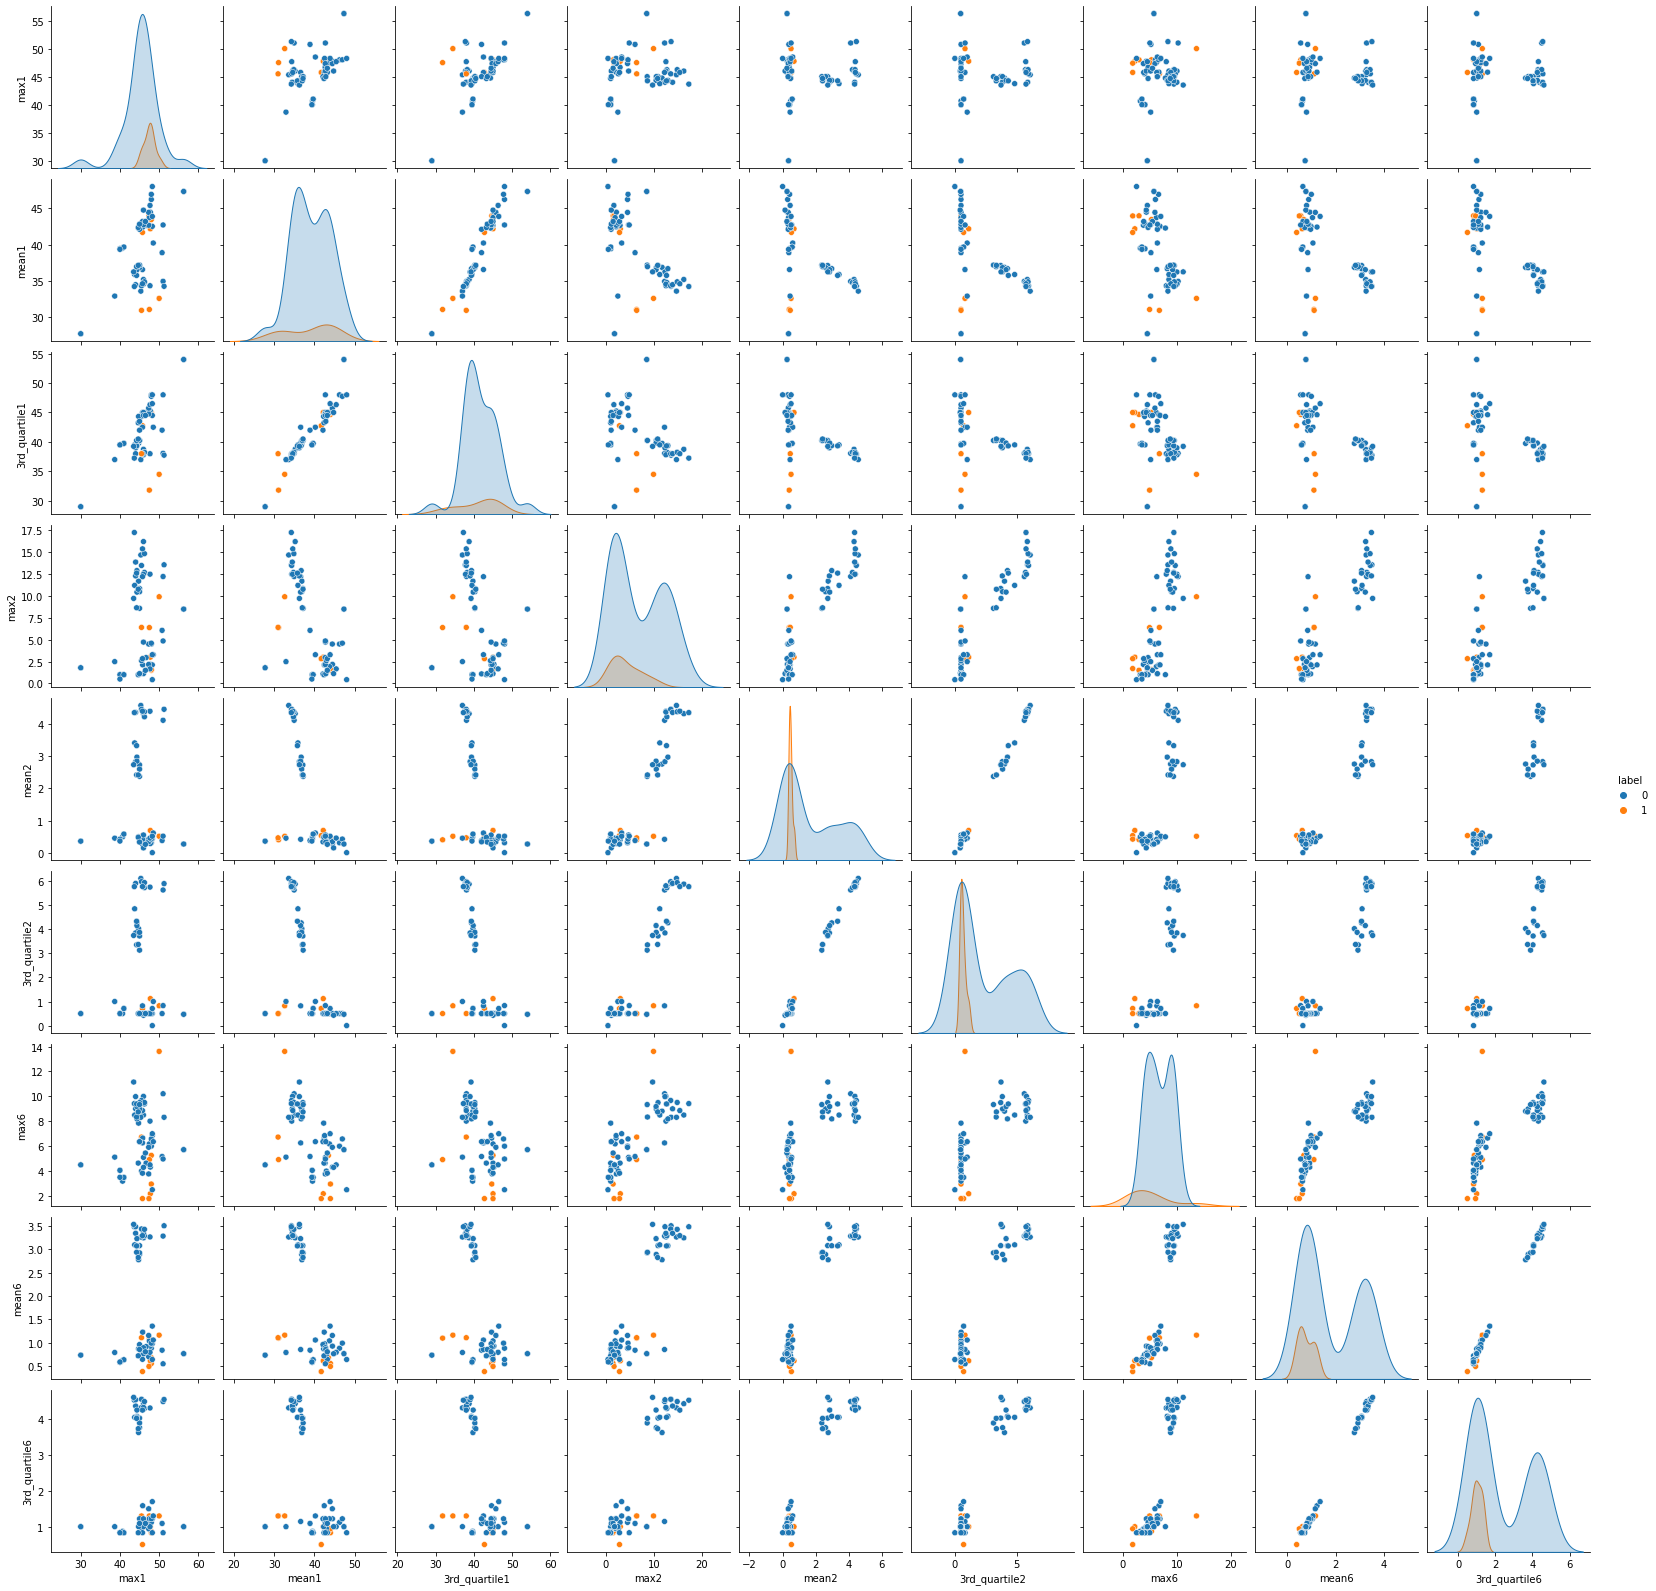

In [12]:
time_series_list=[1,2,6]
data_with_label=[]

for file in train:
    if 'bending' in file:
        df=pd.read_csv(file,skiprows=4)
        result={}
        for i in time_series_list:
            c_min,c_max,c_mean,c_median,c_std,c_1st_quartile,c_3st_quartile=get_tdf(df.iloc[:,i])
            result['max'+str(i)]=c_max
            result['mean'+str(i)]=c_mean
            result['3rd_quartile'+str(i)]=c_3st_quartile
        result['label']=1
        data_with_label.append(result)
    else:
        df=pd.read_csv(file,skiprows=4)
        result={}
        for i in time_series_list:
            c_min,c_max,c_mean,c_median,c_std,c_1st_quartile,c_3st_quartile=get_tdf(df.iloc[:,i])
            result['max'+str(i)]=c_max
            result['mean'+str(i)]=c_mean
            result['3rd_quartile'+str(i)]=c_3st_quartile
        result['label']=0
        data_with_label.append(result)

data_with_label = {key: [d[key] for d in data_with_label] for key in result}
data_with_label=pd.DataFrame(data_with_label)
sns.pairplot(data_with_label, hue='label')
plt.show()

##### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 4(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 4(a)i?

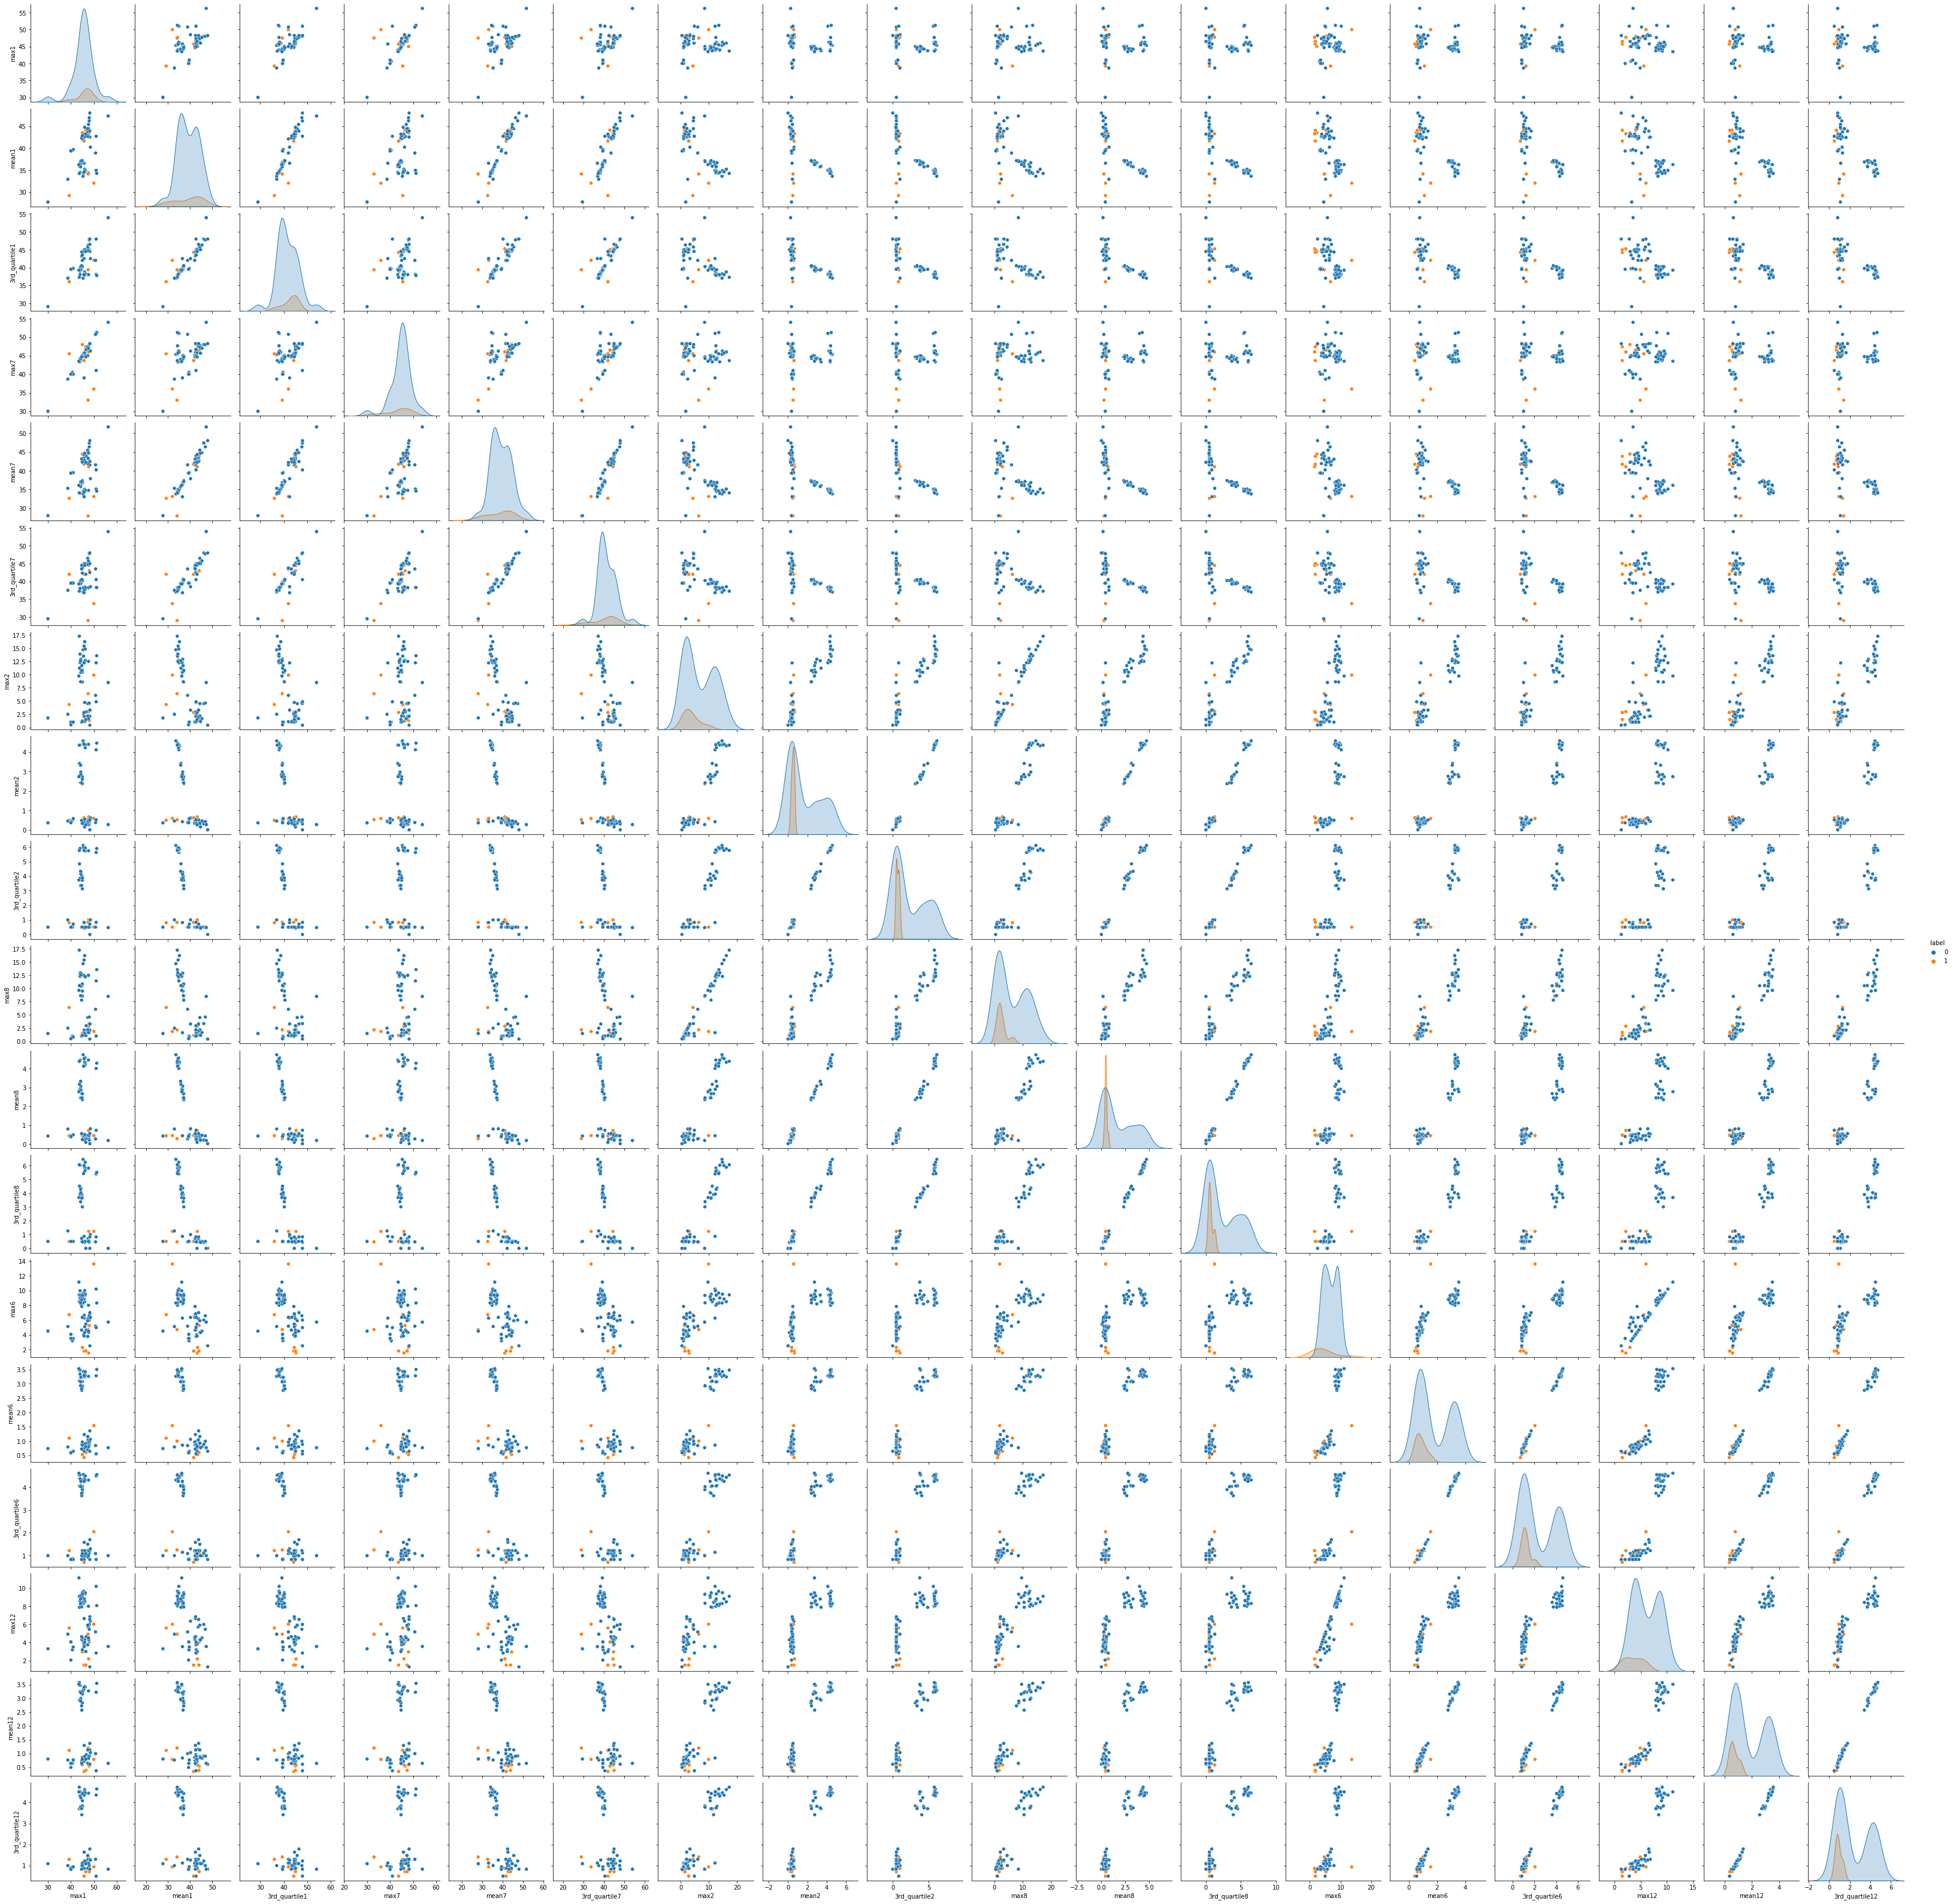

In [13]:
time_series_list=[1,2,6]
data_with_label=[]

for file in train:
    if 'bending' in file:
        df=pd.read_csv(file,skiprows=4)
        df1=df.iloc[:len(df)//2,:]
        df2=df.iloc[len(df)//2:,:]
        result={}
        for i in time_series_list:
            c_min,c_max,c_mean,c_median,c_std,c_1st_quartile,c_3st_quartile=get_tdf(df1.iloc[:,i])
            result['max'+str(i)]=c_max
            result['mean'+str(i)]=c_mean
            result['3rd_quartile'+str(i)]=c_3st_quartile
            c_min,c_max,c_mean,c_median,c_std,c_1st_quartile,c_3st_quartile=get_tdf(df2.iloc[:,i])
            result['max'+str(i+6)]=c_max
            result['mean'+str(i+6)]=c_mean
            result['3rd_quartile'+str(i+6)]=c_3st_quartile
        result['label']=1
        data_with_label.append(result)
    else:
        df=pd.read_csv(file,skiprows=4)
        df1=df.iloc[:len(df)//2,:]
        df2=df.iloc[len(df)//2:,:]
        result={}
        for i in time_series_list:
            c_min,c_max,c_mean,c_median,c_std,c_1st_quartile,c_3st_quartile=get_tdf(df.iloc[:,i])
            result['max'+str(i)]=c_max
            result['mean'+str(i)]=c_mean
            result['3rd_quartile'+str(i)]=c_3st_quartile
            c_min,c_max,c_mean,c_median,c_std,c_1st_quartile,c_3st_quartile=get_tdf(df2.iloc[:,i])
            result['max'+str(i+6)]=c_max
            result['mean'+str(i+6)]=c_mean
            result['3rd_quartile'+str(i+6)]=c_3st_quartile
        result['label']=0
        data_with_label.append(result)

data_with_label = {key: [d[key] for d in data_with_label] for key in result}
data_with_label=pd.DataFrame(data_with_label)
sns.pairplot(data_with_label, hue='label')
plt.show()

Answer: There is no considerable difference between this two scatterplot?

##### iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic re- gression.

In [67]:
def break_data(number,data):
    length=len(data)//number
    i=0
    j=1
    df_new=pd.DataFrame()
    df_final=pd.DataFrame()
    while i+length<=len(data):
        for k in range(1,7):
            df_new[data.columns[k]+'_'+str(j)]=data.iloc[i:i+length,k].reset_index(drop=True)
        j+=1
        i+=length
    for col in df_new.columns:
        df_final[col+'_mean']=[np.mean(df_new[col])]
        df_final[col+'_max']=[max(df_new[col])]
        df_final[col+'_3rd_quartile']=[np.percentile(df_new[col], 75)]
    return df_final

def get_data(file_set,number):
    df_all=pd.DataFrame()
    for file in file_set:
        if 'bending2/' in file and 'dataset4' in file:
            column_names = ['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
            df=pd.read_csv(file,skiprows=5,delimiter=' ',index_col=False)
            df.columns = column_names
        else:
            df=pd.read_csv(file,skiprows=4)
        df=break_data(number,df)
        if 'bending' in file:
            df['label']=1
        else:
            df['label']=0
        df_all=pd.concat([df_all, df], ignore_index=True)
    return df_all

def split_data(data):
    num_splits = 5
    kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)
    return kf.split(data.iloc[:,0:-1],data.iloc[:,-1])

def get_bestp_bestacr(l,p,df_train,df_test,highest_accuracy,best_p,best_accuracy):
    accuracy_all=[]
    index_set=split_data(df_train)
    for train_index, test_index in index_set:
        model = LogisticRegression()
        rfe =RFE(estimator=model, n_features_to_select=p)
        X_train, X_validatoin = df_train.iloc[train_index,0:-1], df_train.iloc[test_index,0:-1]
        y_train, y_validation = df_train.iloc[train_index,-1], df_train.iloc[test_index,-1]
        X_train_rfe=rfe.fit_transform(X_train, y_train)
        X_validation_rfe = rfe.transform(X_validatoin)
        model.fit(X_train_rfe, y_train)
        predictions = model.predict(X_validation_rfe)
        accuracy_all.append(accuracy_score(y_validation, predictions))
    accuracy=np.mean(accuracy_all)
    if accuracy>highest_accuracy:
        highest_accuracy=accuracy
        best_p=p
        #best_model=model.fit(X_train_rfe, y_train)
        X_test = rfe.transform(df_test.iloc[:,0:-1])
        best_model_prediction = model.predict(X_test)
        best_accuracy=accuracy_score(df_test.iloc[:,-1], best_model_prediction)
    return best_p,best_accuracy,highest_accuracy

In [ ]:
lp_list=[]
best_accuracy_list=[]
for l in range(1,21):
    df_test=get_data(test,l)
    df_train=get_data(train,l)
    #index_set=split_data(df_train)
    highest_accuracy=0
    best_p=0
    best_accuracy=0
    for p in range(1,len(df_train.columns)+1):
        best_p,best_accuracy,highest_accuracy=get_bestp_bestacr(l,p,df_train,df_test,highest_accuracy,best_p,best_accuracy)
    lp_list.append((l,best_p))
    best_accuracy_list.append(best_accuracy)
result={
    '(l,p)':lp_list,
    'accuracy':best_accuracy_list
}
result=pd.DataFrame(result)

In [65]:
result

(l,p)  accuracy
0      (1, 4)  0.894737
1      (2, 7)  1.000000
2      (3, 4)  0.947368
3     (4, 20)  0.947368
4      (5, 7)  0.947368
5      (6, 8)  1.000000
6     (7, 31)  0.947368
7     (8, 35)  0.947368
8     (9, 33)  0.947368
9   (10, 158)  0.947368
10    (11, 1)  0.894737
11   (12, 27)  0.947368
12    (13, 2)  0.894737
13   (14, 35)  0.947368
14   (15, 31)  0.947368
15   (16, 58)  0.947368
16  (17, 233)  1.000000
17   (18, 81)  0.947368
18   (19, 28)  0.947368
19   (20, 45)  0.947368

Answer: The right way to do this is performing RFE with cross validation. In another word, the wrong way to do this performing RFE befor cv. 

##### iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [128]:
df_test=get_data(test,1)
df_train=get_data(train,1)
X_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]
X_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]

model = LogisticRegression()
rfe =RFE(estimator=model, n_features_to_select=4)
X_train_rfe=rfe.fit_transform(X_train, y_train)
model=sm.Logit(y_train, sm.add_constant(X_train_rfe))
result_model=model.fit(method='bfgs')
print(result_model.summary())

         Current function value: 0.000534
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.9986
Time:                        23:49:10   Log-Likelihood:              -0.036823
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 7.159e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -633.6222   7.77e+06  -8.16e-05      1.000   -1.52e+07    1.52e+

In [129]:
#confusion matrix
predicted_probabilities=result_model.predict(sm.add_constant(X_train_rfe))
pre=(predicted_probabilities > 0.5).astype(int)
confusion_matrix=metrics.confusion_matrix(y_train, pre)
confusion_matrix

array([[60,  0],
       [ 0,  9]])

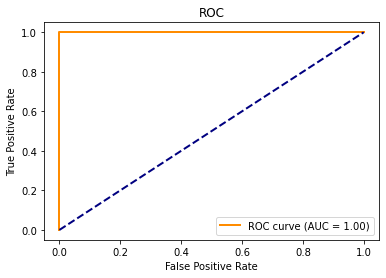

In [130]:
model = LogisticRegression()
model.fit(X_train_rfe, y_train)
y_pre= model.predict_proba(X_train_rfe)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_pre)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

##### v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

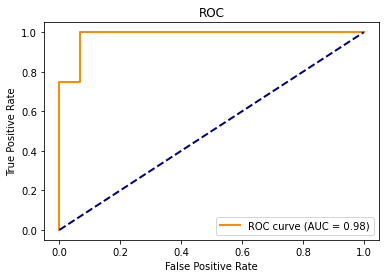

In [131]:
model = LogisticRegression()
rfe =RFE(estimator=model, n_features_to_select=4)
X_train_rfe=rfe.fit_transform(X_train, y_train)
X_test_rfe=rfe.transform(X_test)
model = LogisticRegression()
model.fit(X_train_rfe, y_train)
y_pre= model.predict_proba(X_test_rfe)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pre)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [132]:
y_pred_binary = (y_pre > 0.5).astype(int)
accuracy=accuracy_score(y_test, y_pred_binary)
accuracy

0.9473684210526315

Answer: The accuracy on the test set is almost equal to the cross-validation accuracy. 

##### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Answer: Yes, according to the result, about 96% of observations can be perfectly predicted. This might indicate that there is complete quasi-separation. In this case some parameters will not be identified and it may cause instability in calculating logistic regression parameters.

##### vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Answer: According to the confusion matrices, there are 60 samples that are non-bending class, but only 9 samples that are bending class. So imbalanced classes are exist. 

In [143]:
model = LogisticRegression()
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
p_list=[]
accuracy_list=[]
for p in range(1,len(X_train_resampled.columns)+1):
    index_set=split_data(df_train)
    accuracy_all=[]
    for train_index, test_index in index_set:
        rfe =RFE(estimator=model, n_features_to_select=p)
        X_train_cv, X_validatoin_cv = X_train_resampled.iloc[train_index], X_train_resampled.iloc[test_index]
        y_train_cv, y_validation_cv = y_train_resampled.iloc[train_index], y_train_resampled.iloc[test_index]
        X_train_rfe=rfe.fit_transform(X_train_cv, y_train_cv)
        X_validation_rfe = rfe.transform(X_validatoin_cv)
        model.fit(X_train_rfe, y_train_cv)
        predictions = model.predict(X_validation_rfe)
        accuracy_all.append(accuracy_score(y_validation_cv, predictions))
    accuracy=np.mean(accuracy_all)
    p_list.append(p)
    accuracy_list.append(accuracy)
result2={
    'p':p_list,
    'accuracy':accuracy_list
}
result2=pd.DataFrame(result2)
result2

p  accuracy
0    1  0.927473
1    2  0.942857
2    3  0.971429
3    4  0.985714
4    5  0.985714
5    6  0.985714
6    7  0.985714
7    8  0.985714
8    9  0.985714
9   10  0.985714
10  11  0.985714
11  12  0.985714
12  13  0.985714
13  14  0.985714
14  15  0.985714
15  16  0.985714
16  17  0.985714
17  18  0.985714

In [144]:
model = LogisticRegression()
rfe =RFE(estimator=model, n_features_to_select=4)
X_train_rfe=rfe.fit_transform(X_train_resampled, y_train_resampled)
model=sm.Logit(y_train_resampled, sm.add_constant(X_train_rfe))
result_model=model.fit(method='bfgs')

predicted_probabilities=result_model.predict(sm.add_constant(X_train_rfe))
pre=(predicted_probabilities > 0.5).astype(int)
confusion_matrix=metrics.confusion_matrix(y_train_resampled, pre)
confusion_matrix

         Current function value: 0.028663
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


array([[58,  2],
       [ 0, 60]])

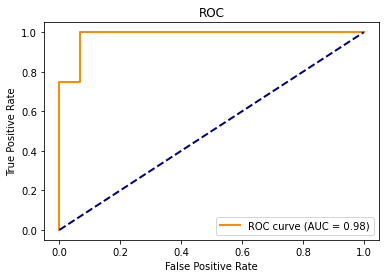

In [145]:
model = LogisticRegression()
X_test_rfe=rfe.transform(X_test)
model.fit(X_train_rfe, y_train_resampled)
y_pre= model.predict_proba(X_test_rfe)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pre)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

#### (b) Binary Classification Using L1-penalized logistic regression

##### i. Repeat 4(a)iii using L1-penalized logistic regression,8 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [172]:
def l1_logistic_regression(l,train,test):
    df_test=get_data(test,l)
    df_train=get_data(train,l)
    scaler=MinMaxScaler()
    X_train=scaler.fit_transform(df_train.iloc[:,0:-1])
    y_train=df_train.iloc[:,-1]
    X_test=scaler.transform(df_test.iloc[:,0:-1])
    y_test=df_test.iloc[:,-1]
    cv_model=LogisticRegressionCV(max_iter=100,scoring='accuracy', cv=StratifiedKFold(n_splits=5), penalty='l1', solver='liblinear', random_state=42)
    cv_model.fit(X_train, y_train)
    y_pred=cv_model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    print(f'L Value: {l},test_accuracy: {round(accuracy,2)}')

In [173]:
for l in range(1,21):
    l1_logistic_regression(l,train,test)

L Value: 1,test_accuracy: 1.0
L Value: 2,test_accuracy: 0.95
L Value: 3,test_accuracy: 0.95
L Value: 4,test_accuracy: 0.95
L Value: 5,test_accuracy: 0.95
L Value: 6,test_accuracy: 0.95
L Value: 7,test_accuracy: 1.0
L Value: 8,test_accuracy: 0.95
L Value: 9,test_accuracy: 0.95
L Value: 10,test_accuracy: 0.95
L Value: 11,test_accuracy: 0.95
L Value: 12,test_accuracy: 0.95
L Value: 13,test_accuracy: 0.95
L Value: 14,test_accuracy: 0.95
L Value: 15,test_accuracy: 0.95
L Value: 16,test_accuracy: 0.95
L Value: 17,test_accuracy: 0.95
L Value: 18,test_accuracy: 0.95
L Value: 19,test_accuracy: 0.95
L Value: 20,test_accuracy: 0.95


The best L value is 1. 

##### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

The L1-penalized logistic regression has better performance than variable selection using p-values and it is also easier to implement because it don't need to do the feature selection manually. 

#### (c) Multi-class Classification (The Realistic Case)

##### i. Find the best l in the same way as you found it in 4(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

In [216]:
def get_data_multi(file_set,number):
    df_all=pd.DataFrame()
    for file in file_set:
        if 'bending2/' in file and 'dataset4' in file:
            column_names = ['# Columns: time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
            df=pd.read_csv(file,skiprows=5,delimiter=' ',index_col=False)
            df.columns = column_names
        else:
            df=pd.read_csv(file,skiprows=4)
        df=break_data(number,df)
        if 'bending1' in file:
            df['label']=1
        if 'walking' in file:
            df['label']=2
        if 'bending2' in file:
            df['label']=3
        if 'standing' in file:
            df['label']=4
        if 'sitting' in file:
            df['label']=5
        if 'lying' in file:
            df['label']=6
        if 'cycling' in file:
            df['label']=7
        df_all=pd.concat([df_all, df], ignore_index=True)
    return df_all

def l1_logistic_regression_multi(l,train,test,best_l=None):
    if best_l:
        df_test=get_data_multi(test,best_l)
        df_train=get_data_multi(train,best_l)
        scaler=MinMaxScaler()
        X_train=scaler.fit_transform(df_train.iloc[:,0:-1])
        y_train=df_train.iloc[:,-1]
        X_test=scaler.transform(df_test.iloc[:,0:-1])
        y_test=df_test.iloc[:,-1]
        cv_model=LogisticRegressionCV(max_iter=100,scoring='accuracy', cv=StratifiedKFold(n_splits=5), penalty='l1', multi_class='multinomial', solver='saga', random_state=42)
        cv_model.fit(X_train, y_train)
        y_pred=cv_model.predict(X_test)
        accuracy=accuracy_score(y_test, y_pred)
        cm=confusion_matrix(y_test, y_pred)
        print('Confusion Matrix:')
        print(cm)
    else: 
        l_value=l
        df_test=get_data_multi(test,l)
        df_train=get_data_multi(train,l)
        scaler=MinMaxScaler()
        X_train=scaler.fit_transform(df_train.iloc[:,0:-1])
        y_train=df_train.iloc[:,-1]
        X_test=scaler.transform(df_test.iloc[:,0:-1])
        y_test=df_test.iloc[:,-1]
        cv_model=LogisticRegressionCV(max_iter=100,scoring='accuracy', cv=StratifiedKFold(n_splits=5), penalty='l1', multi_class='multinomial', solver='saga', random_state=42)
        cv_model.fit(X_train, y_train)
        y_pred=cv_model.predict(X_test)
        accuracy=accuracy_score(y_test, y_pred)
        print(f'L Value: {l},test_accuracy: {round(accuracy,2)}')

In [218]:
for l in range(1,21):
    l1_logistic_regression_multi(l,train,test)

L Value: 1,test_accuracy: 1.0
L Value: 2,test_accuracy: 0.89
L Value: 3,test_accuracy: 0.89
L Value: 4,test_accuracy: 0.95
L Value: 5,test_accuracy: 0.84
L Value: 6,test_accuracy: 0.89
L Value: 7,test_accuracy: 0.89
L Value: 8,test_accuracy: 0.84
L Value: 9,test_accuracy: 0.84
L Value: 10,test_accuracy: 0.79
L Value: 11,test_accuracy: 0.89
L Value: 12,test_accuracy: 0.84
L Value: 13,test_accuracy: 0.89
L Value: 14,test_accuracy: 0.84
L Value: 15,test_accuracy: 0.84
L Value: 16,test_accuracy: 0.79
L Value: 17,test_accuracy: 0.84
L Value: 18,test_accuracy: 0.79
L Value: 19,test_accuracy: 0.79
L Value: 20,test_accuracy: 0.84


The best L value is 1. 

In [219]:
l1_logistic_regression_multi(1,train,test,best_l=1)

Confusion Matrix:
[[2 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


In [235]:
y_test=pd.get_dummies(y_test, prefix='Category')
y_test.iloc[:,1]

0     0
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
Name: Category_2, dtype: uint8

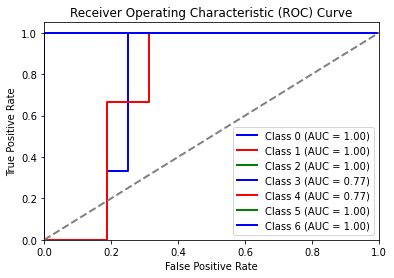

In [237]:
df_test=get_data_multi(test,1)
df_train=get_data_multi(train,1)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(df_train.iloc[:,0:-1])
y_train=df_train.iloc[:,-1]
X_test=scaler.transform(df_test.iloc[:,0:-1])
y_test=df_test.iloc[:,-1]
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
y_test=pd.get_dummies(y_test, prefix='Category')

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 7

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### ii. Repeat 4(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [241]:
def Gaussian_classifier(l,train,test,best_l=None):
    if best_l:
        df_test=get_data_multi(test,best_l)
        df_train=get_data_multi(train,best_l)
        X_train=df_train.iloc[:,0:-1]
        y_train=df_train.iloc[:,-1]
        X_test=df_test.iloc[:,0:-1]
        y_test=df_test.iloc[:,-1]
        model=GaussianNB()
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        cm=confusion_matrix(y_test, y_pred)
        print('Confusion Matrix:')
        print(cm)
    else: 
        df_test=get_data_multi(test,l)
        df_train=get_data_multi(train,l)
        X_train=df_train.iloc[:,0:-1]
        y_train=df_train.iloc[:,-1]
        X_test=df_test.iloc[:,0:-1]
        y_test=df_test.iloc[:,-1]
        model=GaussianNB()
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test, y_pred)
        print(f'L Value: {l},test_accuracy: {round(accuracy,2)}')

In [242]:
for l in range(1,21):
    Gaussian_classifier(l,train,test)

L Value: 1,test_accuracy: 1.0
L Value: 2,test_accuracy: 0.95
L Value: 3,test_accuracy: 0.89
L Value: 4,test_accuracy: 0.89
L Value: 5,test_accuracy: 0.89
L Value: 6,test_accuracy: 0.84
L Value: 7,test_accuracy: 0.84
L Value: 8,test_accuracy: 0.89
L Value: 9,test_accuracy: 0.84
L Value: 10,test_accuracy: 0.84
L Value: 11,test_accuracy: 0.84
L Value: 12,test_accuracy: 0.84
L Value: 13,test_accuracy: 0.84
L Value: 14,test_accuracy: 0.84
L Value: 15,test_accuracy: 0.79
L Value: 16,test_accuracy: 0.84
L Value: 17,test_accuracy: 0.84
L Value: 18,test_accuracy: 0.84
L Value: 19,test_accuracy: 0.84
L Value: 20,test_accuracy: 0.84


The best L value is 1. 

In [243]:
Gaussian_classifier(1,train,test,best_l=1)

Confusion Matrix:
[[2 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 3]]


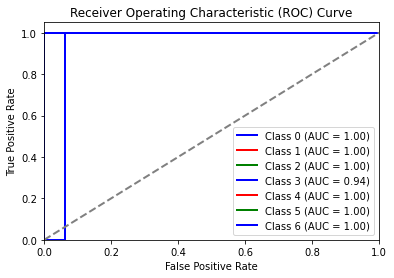

In [246]:
df_test=get_data_multi(test,1)
df_train=get_data_multi(train,1)
X_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]
X_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]
classifier = OneVsRestClassifier(GaussianNB())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
y_test=pd.get_dummies(y_test, prefix='Category')

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 7

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [249]:
def MultinomialNB_classifier(l,train,test,best_l=None):
    if best_l:
        df_test=get_data_multi(test,best_l)
        df_train=get_data_multi(train,best_l)
        X_train=df_train.iloc[:,0:-1]
        y_train=df_train.iloc[:,-1]
        X_test=df_test.iloc[:,0:-1]
        y_test=df_test.iloc[:,-1]
        model=MultinomialNB()
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        cm=confusion_matrix(y_test, y_pred)
        print('Confusion Matrix:')
        print(cm)
    else: 
        df_test=get_data_multi(test,l)
        df_train=get_data_multi(train,l)
        X_train=df_train.iloc[:,0:-1]
        y_train=df_train.iloc[:,-1]
        X_test=df_test.iloc[:,0:-1]
        y_test=df_test.iloc[:,-1]
        model=MultinomialNB()
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        accuracy=accuracy_score(y_test, y_pred)
        print(f'L Value: {l},test_accuracy: {round(accuracy,2)}')

In [250]:
for l in range(1,21):
    MultinomialNB_classifier(l,train,test)

L Value: 1,test_accuracy: 0.95
L Value: 2,test_accuracy: 0.89
L Value: 3,test_accuracy: 0.89
L Value: 4,test_accuracy: 0.95
L Value: 5,test_accuracy: 0.95
L Value: 6,test_accuracy: 0.95
L Value: 7,test_accuracy: 0.95
L Value: 8,test_accuracy: 0.89
L Value: 9,test_accuracy: 0.89
L Value: 10,test_accuracy: 0.89
L Value: 11,test_accuracy: 0.89
L Value: 12,test_accuracy: 0.89
L Value: 13,test_accuracy: 0.89
L Value: 14,test_accuracy: 0.89
L Value: 15,test_accuracy: 0.89
L Value: 16,test_accuracy: 0.89
L Value: 17,test_accuracy: 0.89
L Value: 18,test_accuracy: 0.84
L Value: 19,test_accuracy: 0.89
L Value: 20,test_accuracy: 0.89


The best L value is 1

In [251]:
MultinomialNB_classifier(1,train,test,best_l=1)

Confusion Matrix:
[[2 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 1 2 0]
 [0 0 0 0 0 0 3]]


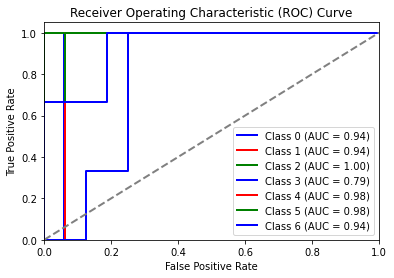

In [254]:
df_test=get_data_multi(test,1)
df_train=get_data_multi(train,1)
X_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]
X_test=df_test.iloc[:,0:-1]
y_test=df_test.iloc[:,-1]
classifier = OneVsRestClassifier(MultinomialNB())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
y_test=pd.get_dummies(y_test, prefix='Category')

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 7

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##### iii. Which method is better for multi-class classification in this problem?

This three classifier all have similar performance, but according to the ROC, Gaussian classifier is the best one in this problem. 

### 3) ISLR 4.8.3

##### This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a classspecific mean vector and a class specific covariance matrix. We consider the simple case where p = 1; i.e. there is only one feature. Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal distribution, X ∼ N(μk, σ2k). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.

Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ21 = ... = σ2K.

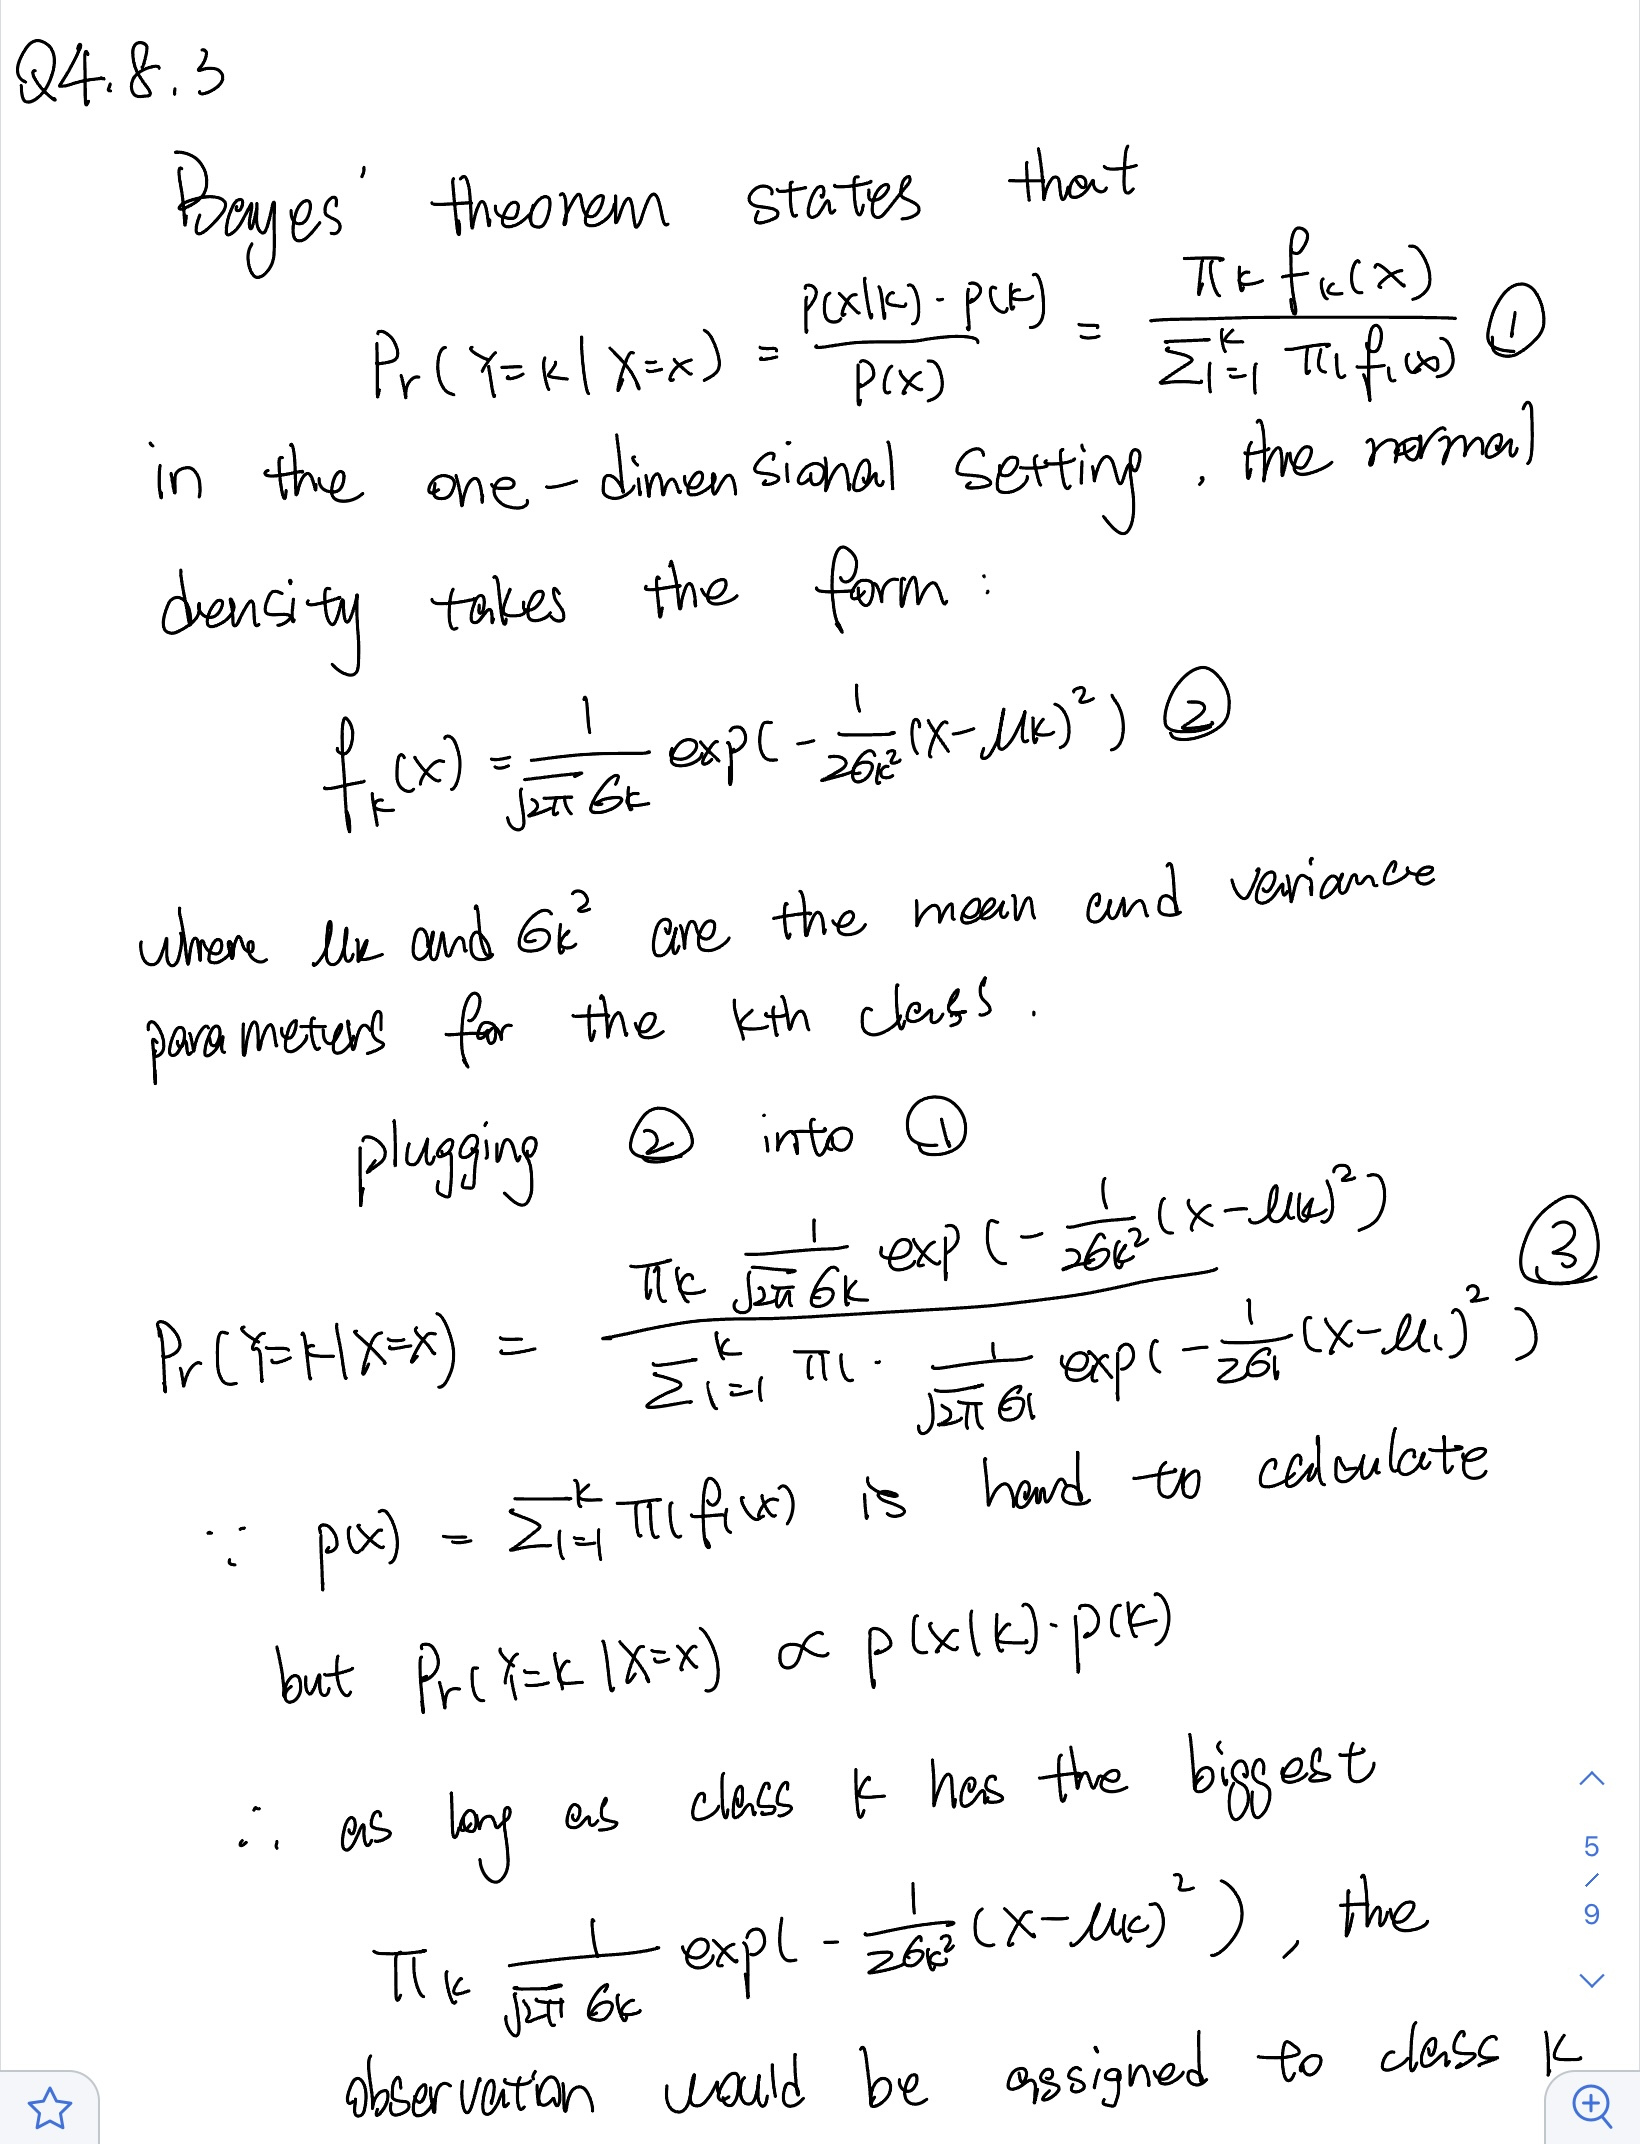

In [264]:
image_path = '/Users/daiqiaochu/Downloads/IMG_0231.jpg'

display(Image(filename=image_path, width=800, height=600))

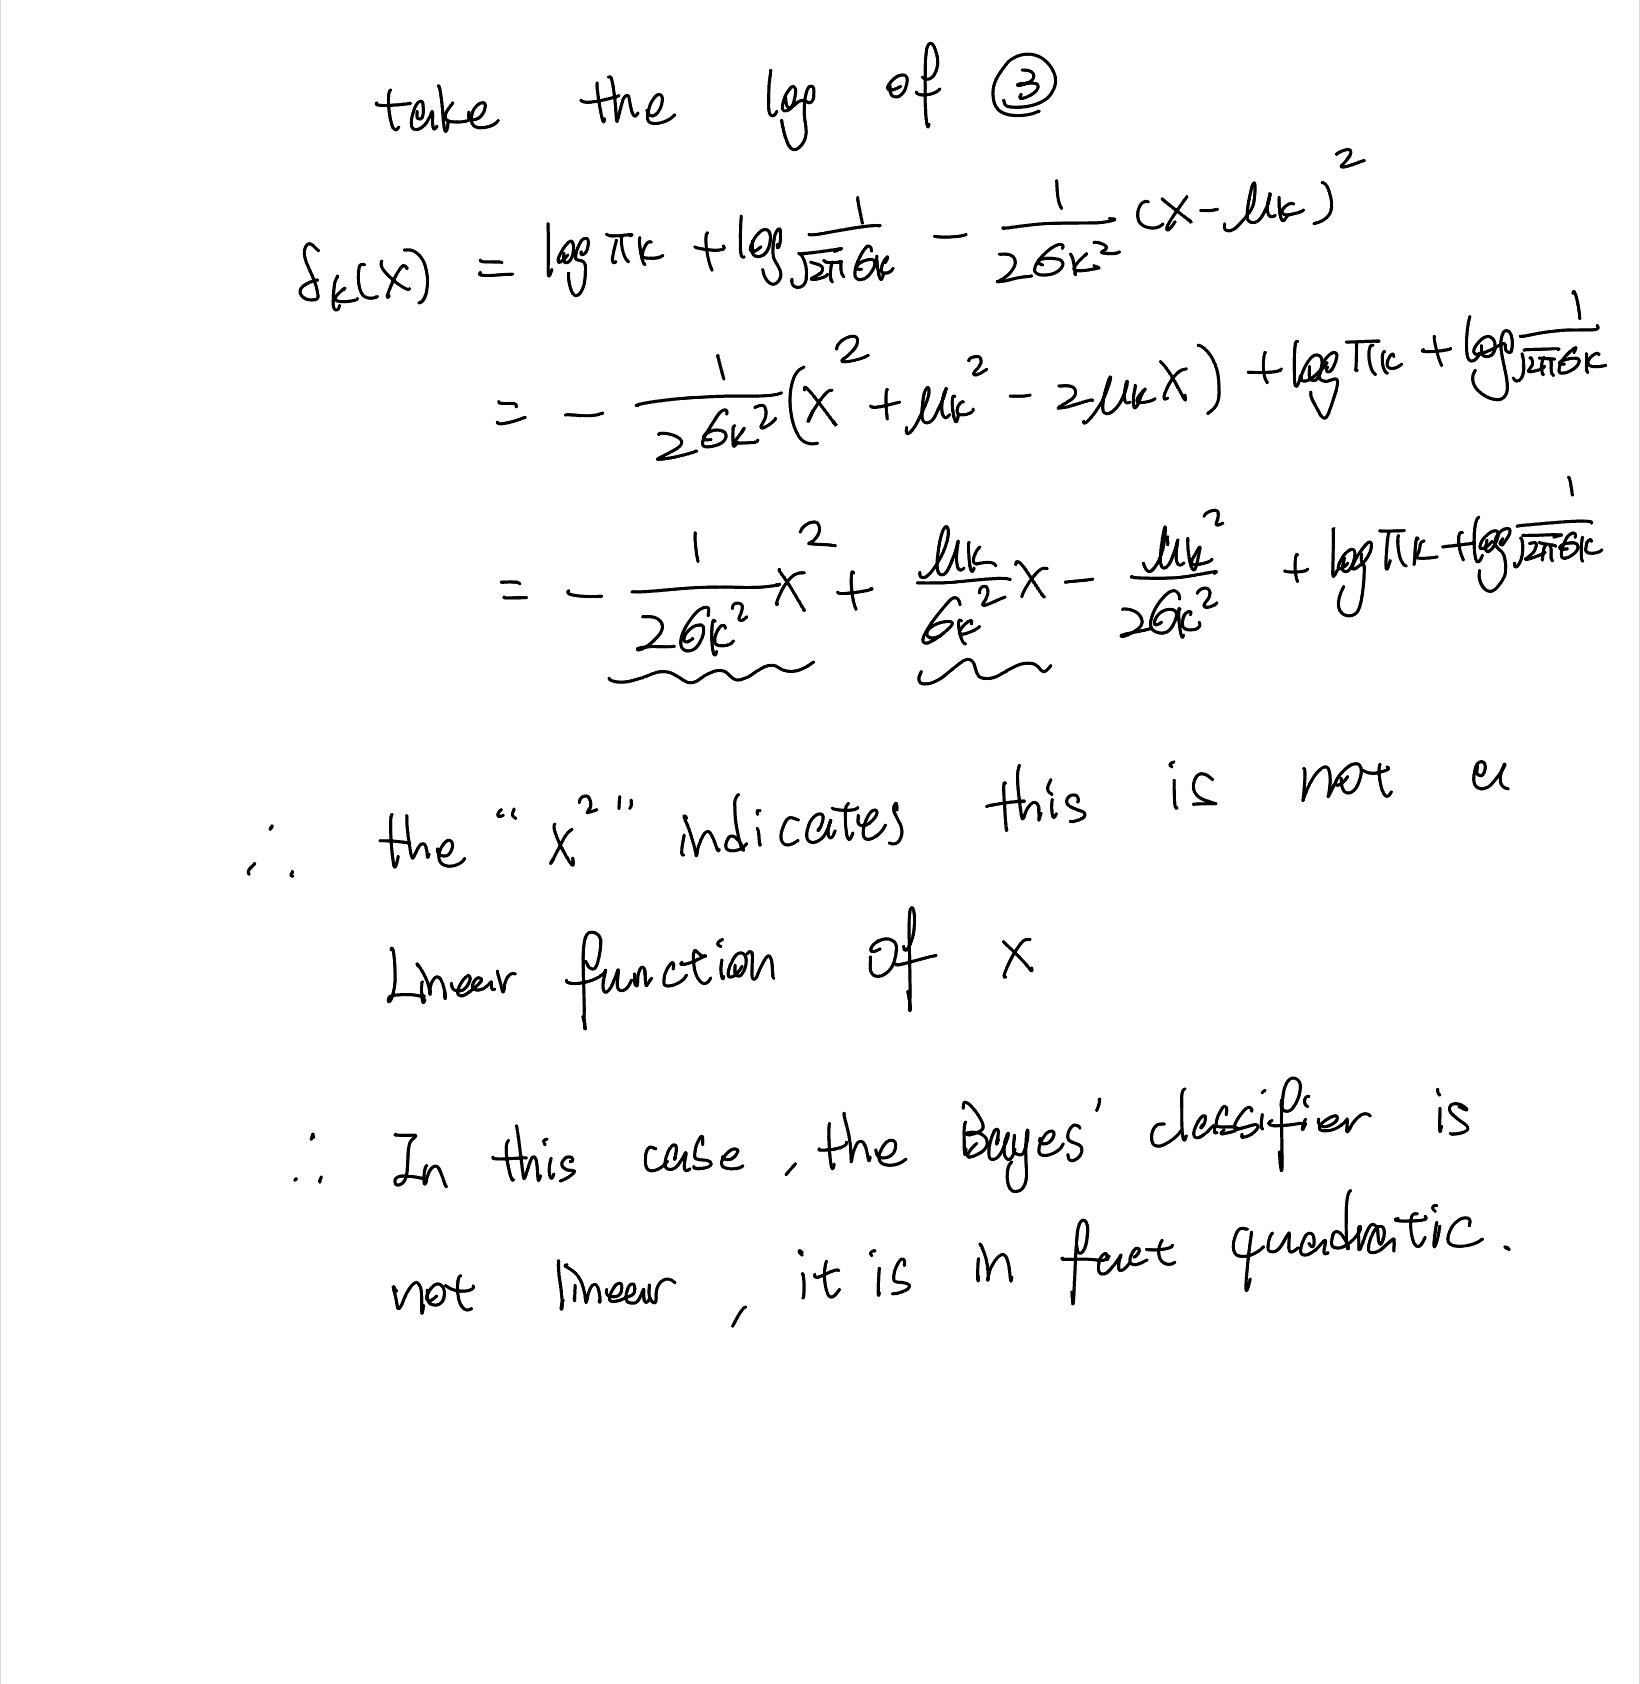

In [265]:
image_path = '/Users/daiqiaochu/Downloads/IMG_0232.jpg'

display(Image(filename=image_path, width=800, height=600))

### 4) ISLR 4.8.7

#### Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X¯ = 10, while the mean for those that didn’t was X¯ = 0. In addition, the variance of X for these two sets of companies was ˆσ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year

Hint: Recall that the density function for a normal random variable is f(x) = √1 2πσ2 e−(x−μ)2/2σ2. You will need to use Bayes’ theorem.

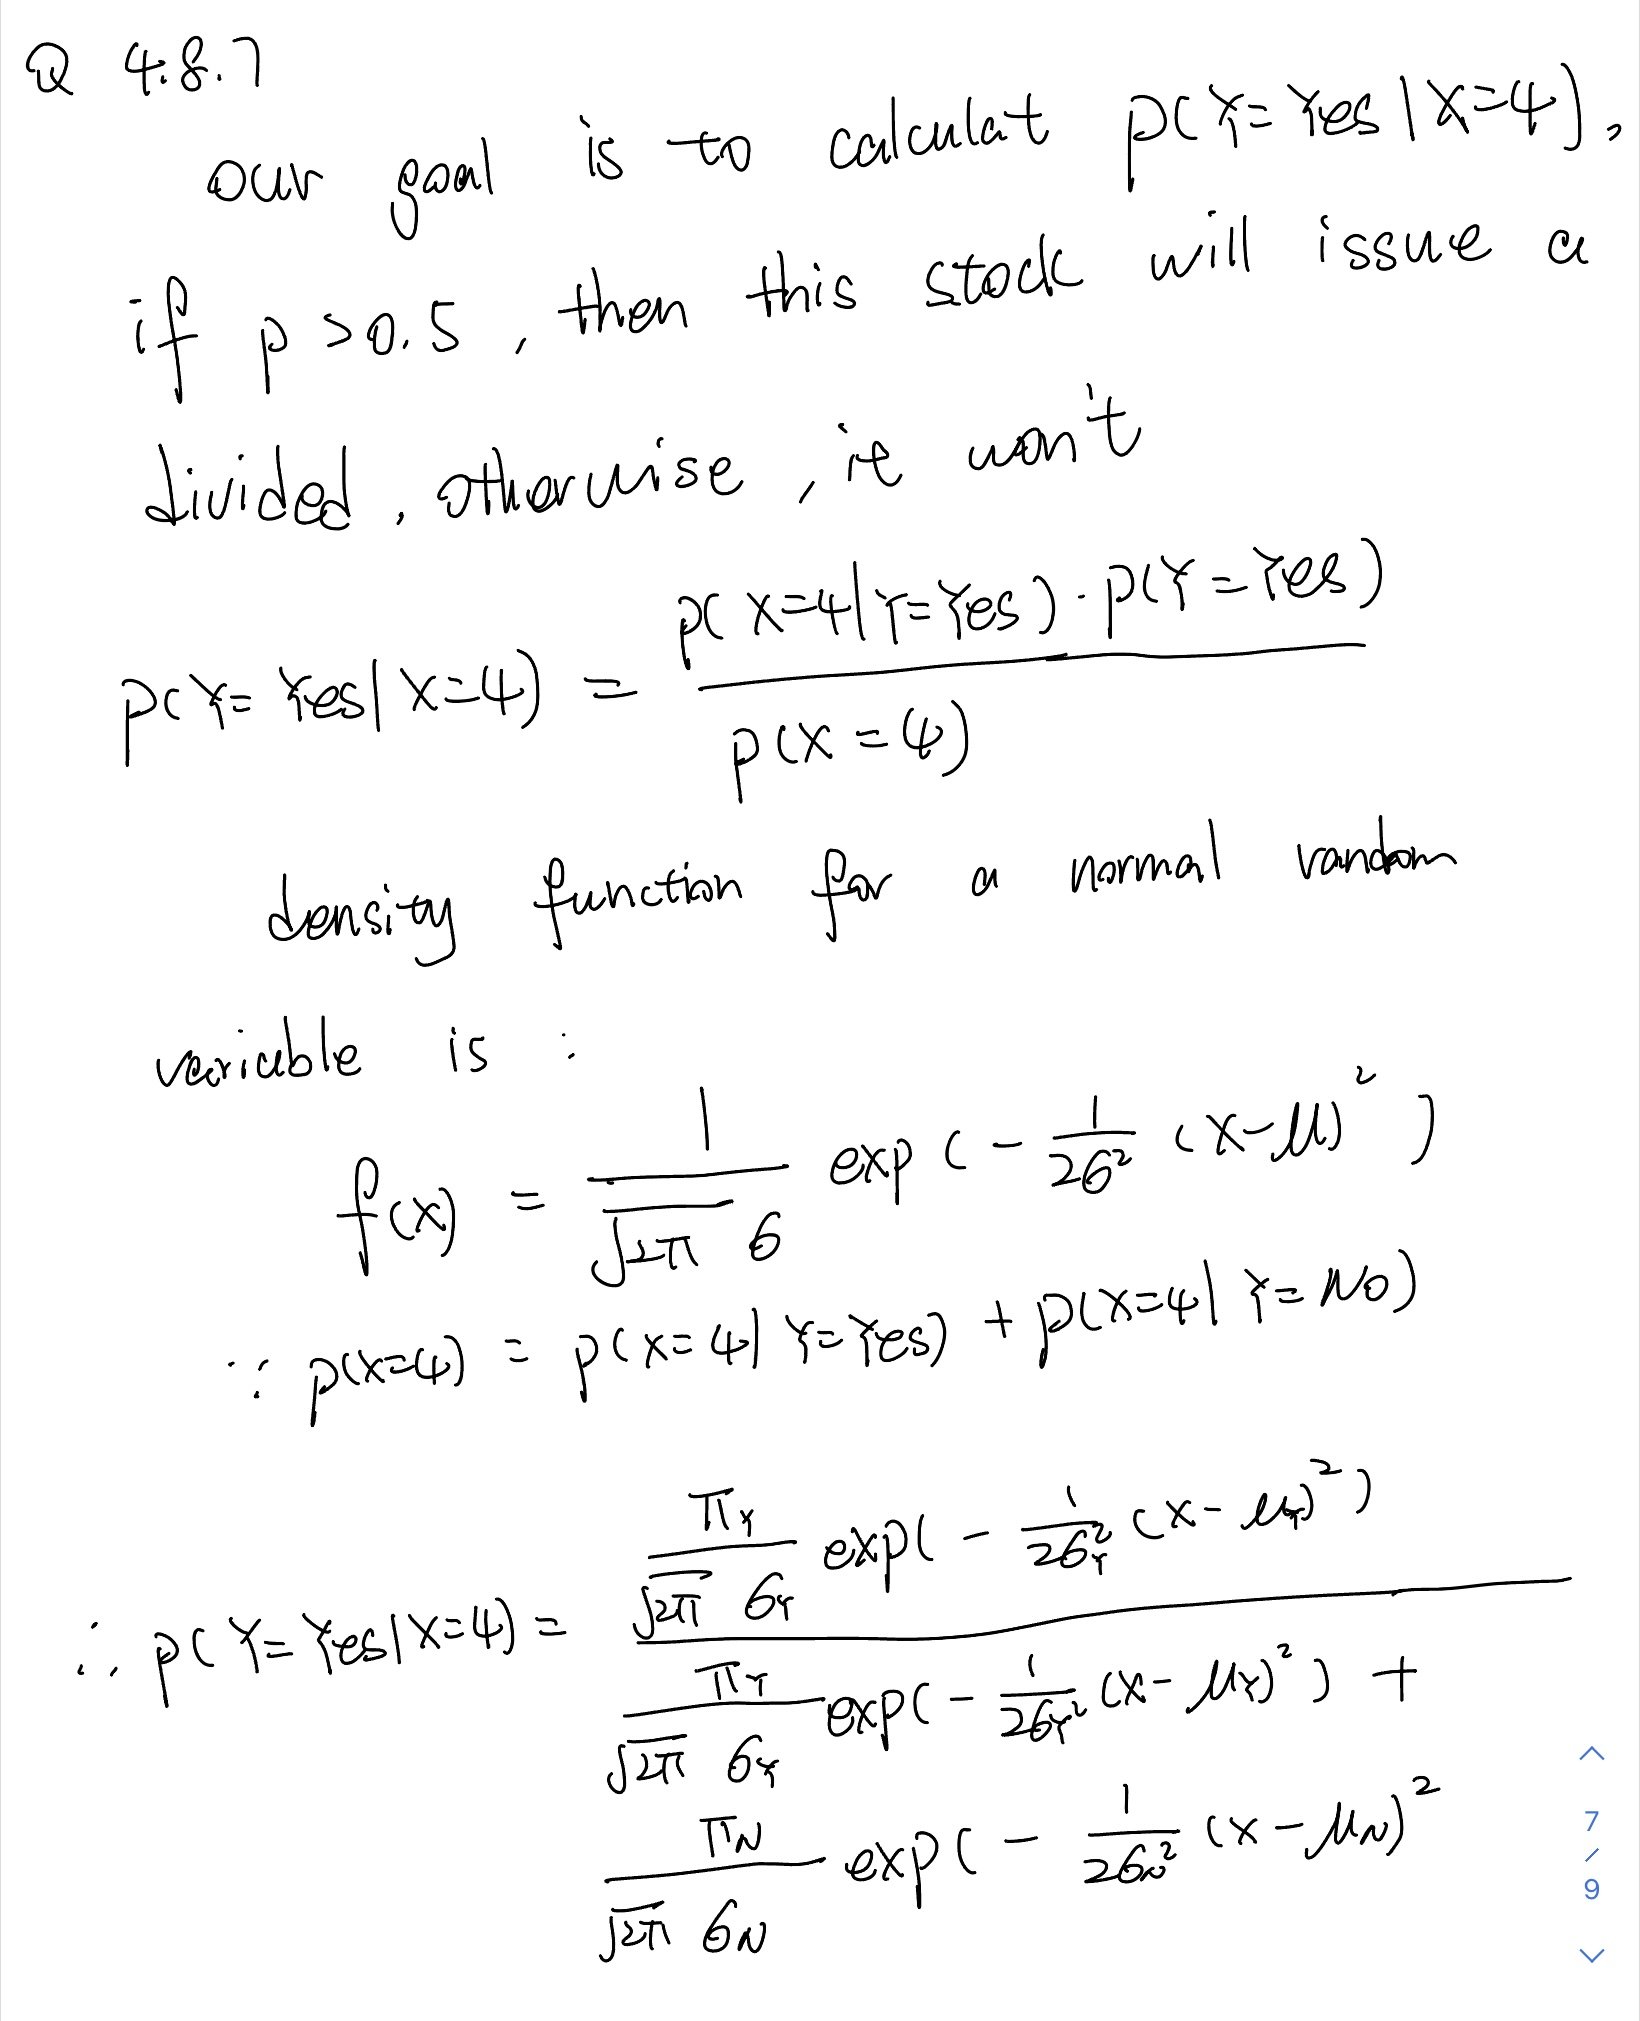

In [266]:
image_path = '/Users/daiqiaochu/Downloads/IMG_0233.jpg'

display(Image(filename=image_path, width=800, height=600))

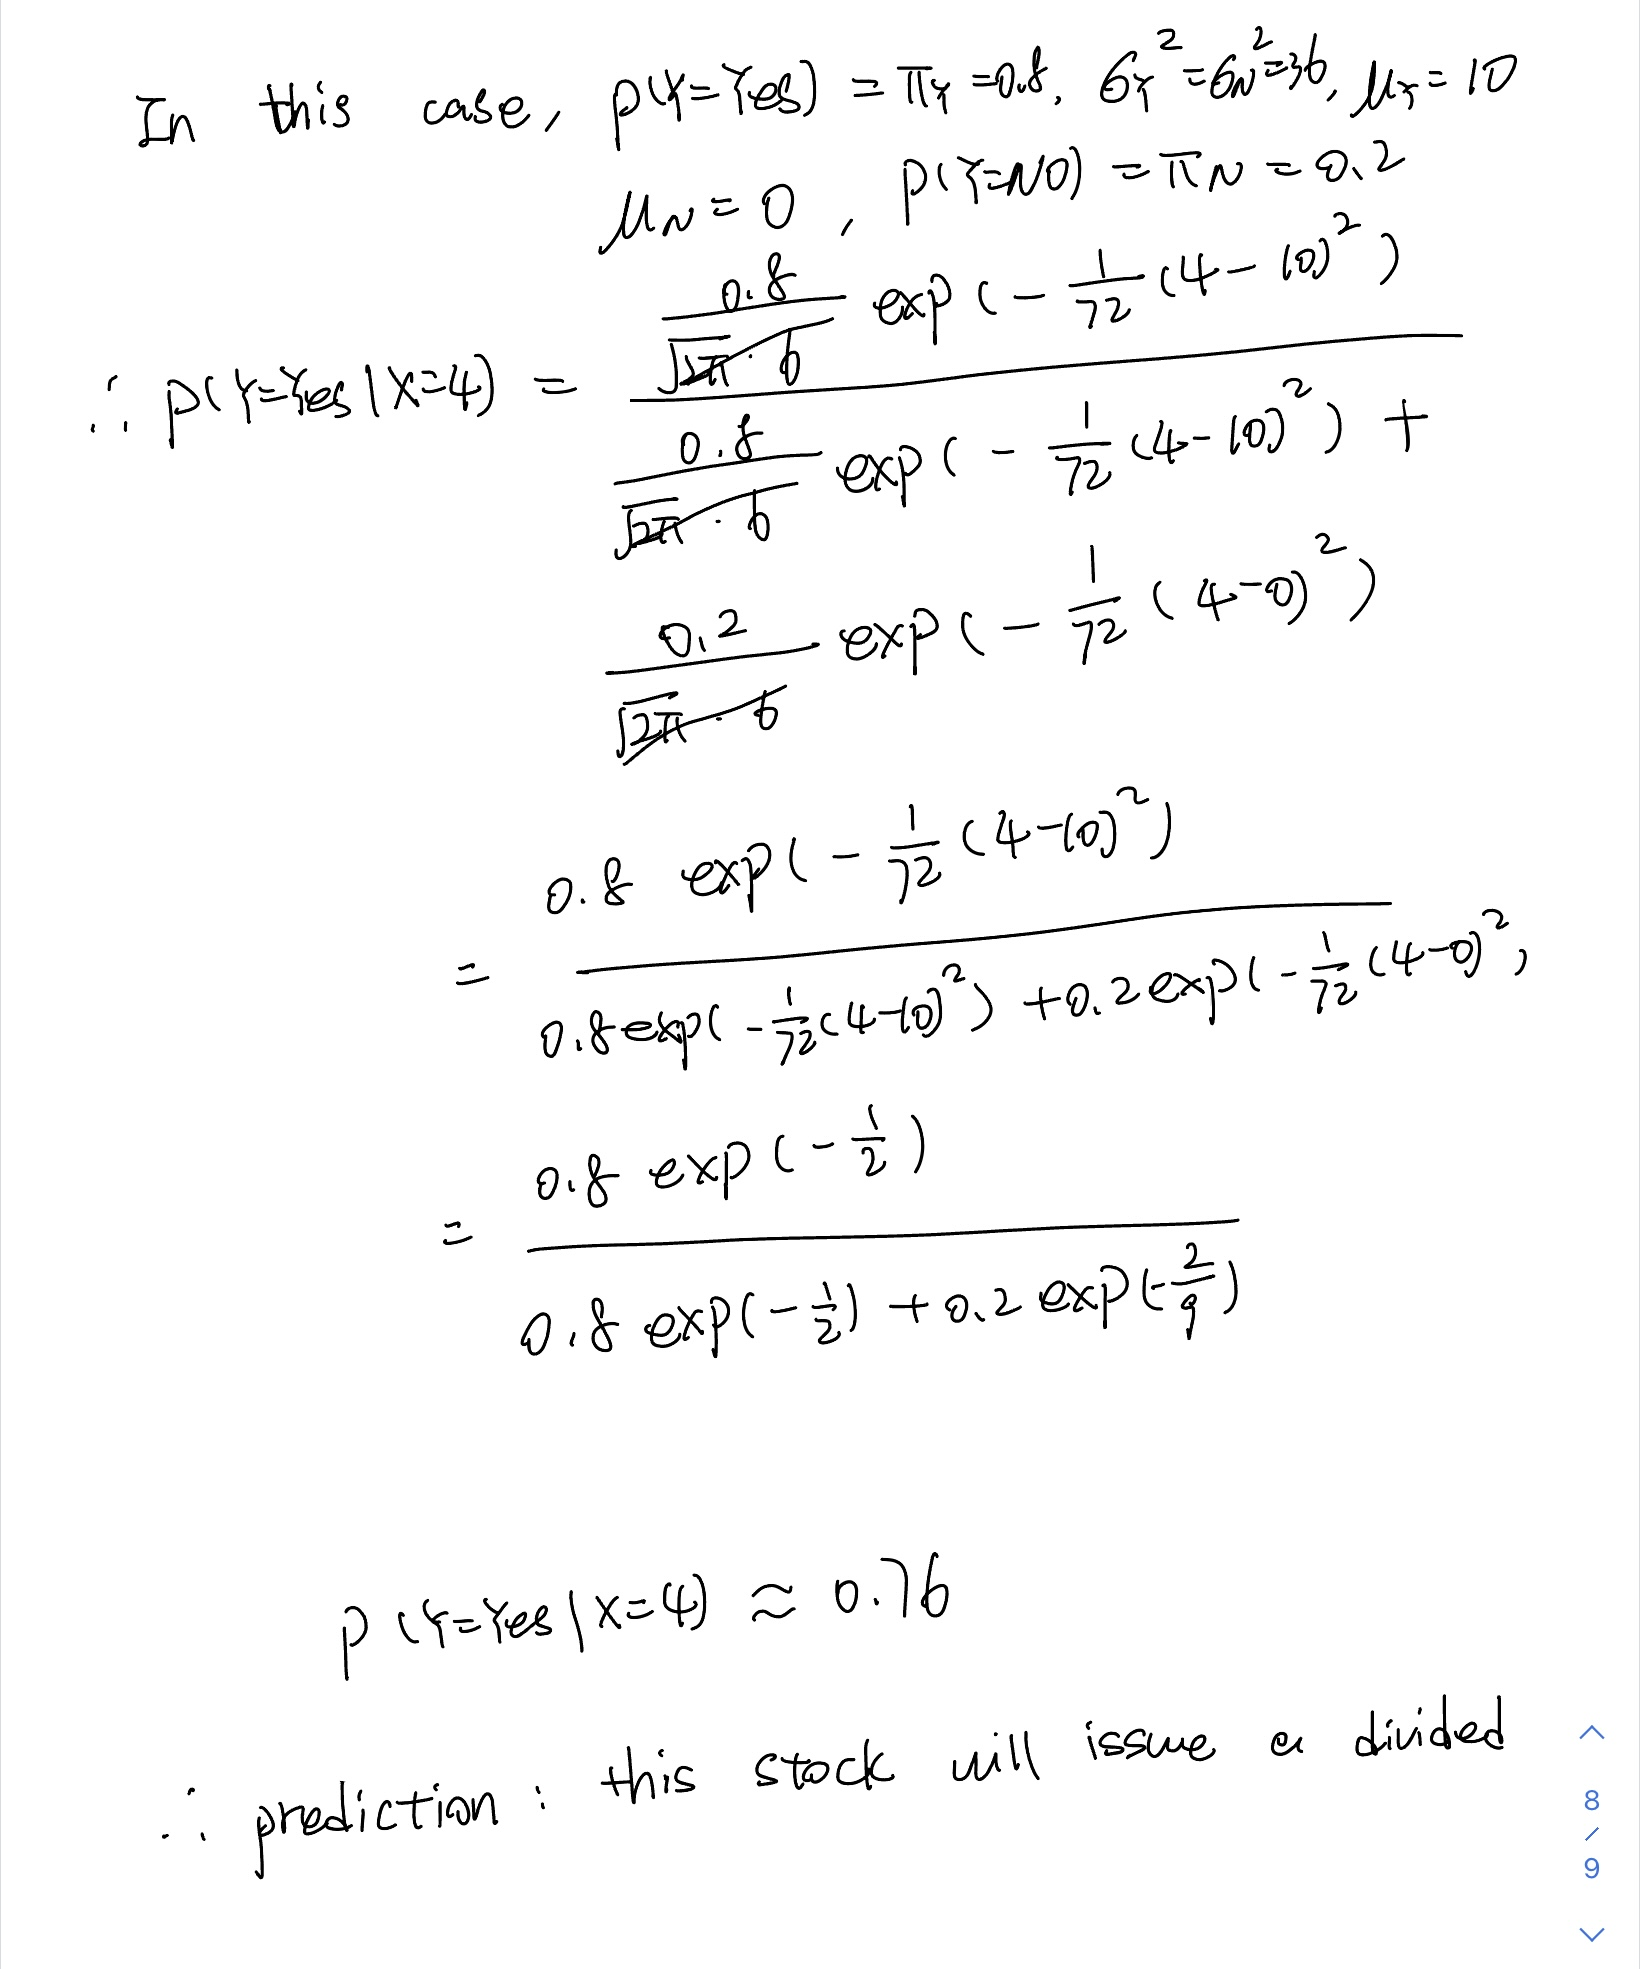

In [267]:
image_path = '/Users/daiqiaochu/Downloads/IMG_0234.jpg'

display(Image(filename=image_path, width=800, height=600))